In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore') # to ignore the warnings


In [74]:
data = pd.read_csv("loan_data.csv")
data.head()

,AsofDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidinFullDate,ChargeoffDate,GrossChargeoffAmount,RevolverStatus,JobsSupported,SoldSecondMarketInd
0,9/30/2024,7A,KFC OF TITUSVILLE,KENTUCKY FRIED CHICKEN OF TITU,TITUSVILLE,PA,16354,"PNC Bank, National Association",6384.00,NaN,...,15.00,CORPORATION,NaN,PIF,7/31/2005,NaN,0,0,0,Y
1,9/30/2024,7A,SUPER SACK MFG. CORP & BAG,HIGHWAY 82 EAST,SAVOY,TX,75479,"First Western SBLC, Inc",NaN,NaN,...,4.00,CORPORATION,NaN,CANCLD,NaN,NaN,0,0,0,NaN
2,9/30/2024,7A,MULTINATIONAL ACCEPTANC/M MOSS,4398 OLD BROOK RUN,BIRMINGHAM,AL,35243,"Wells Fargo Bank, National Association",3511.00,NaN,...,6.00,CORPORATION,NaN,CHGOFF,NaN,4/7/1997,36536,0,0,NaN
3,9/30/2024,7A,STEED TRUCK AND CRANE INC.,PO BOX 121,DUNNIGAN,CA,95937,Westamerica Bank,3430.00,NaN,...,3.00,INDIVIDUAL,NaN,PIF,7/31/2005,NaN,0,0,0,NaN
4,9/30/2024,7A,GENE'S OK TIRE STORE INC.,1324 N. 4TH,PASCO,WA,99301,"U.S. Bank, National Association",6548.00,NaN,...,4.00,CORPORATION,NaN,PIF,7/31/2005,NaN,0,0,0,NaN


In [75]:
data.columns

Index(['AsofDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity',
       'BorrState', 'BorrZip', 'BankName', 'BankFDICNumber', 'BankNCUANumber',
       'BankStreet', 'BankCity', 'BankState', 'BankZip', 'GrossApproval',
       'SBAGuaranteedApproval', 'ApprovalDate', 'ApprovalFY',
       'FirstDisbursementDate', 'DeliveryMethod', 'Subprogram',
       'InitialInterestRate', 'FixedorVariableInterestRate', 'TerminMonths',
       'NAICSCode', 'NAICSDescription', 'FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
       'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'LoanStatus',
       'PaidinFullDate', 'ChargeoffDate', 'GrossChargeoffAmount',
       'RevolverStatus', 'JobsSupported', 'SoldSecondMarketInd'],
      dtype='object')

In [76]:
columns_to_drop = ['Program','NAICSCode', 'AsofDate', 'BorrName', 'BorrStreet', 'BorrCity','DeliveryMethod','FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice', 'BorrState', 'BorrZip', 'BankName', 'BankFDICNumber', 'BankNCUANumber',
       'BankStreet', 'BankCity', 'BankState', 'BankZip', 'ApprovalDate', 'ApprovalFY',
       'CongressionalDistrict', 'BusinessAge', 'PaidinFullDate', 'ChargeoffDate', 'GrossChargeoffAmount',
       'RevolverStatus', 'JobsSupported', 'SoldSecondMarketInd',  'InitialInterestRate', 'FixedorVariableInterestRate']
       

In [77]:
df = data.drop(columns=columns_to_drop, axis=1)

df

,GrossApproval,SBAGuaranteedApproval,FirstDisbursementDate,Subprogram,TerminMonths,NAICSDescription,BusinessType,LoanStatus
0,575000.00,460000.00,10/31/1991,Guaranty,120,NaN,CORPORATION,PIF
1,470000.00,399500.00,NaN,Guaranty,120,"Fiber Can, Tube, Drum, and Similar Products Ma...",CORPORATION,CANCLD
2,95000.00,85500.00,10/31/1991,Guaranty,50,Collection Agencies,CORPORATION,CHGOFF
3,330000.00,280500.00,1/31/1992,Guaranty,96,NaN,INDIVIDUAL,PIF
4,240000.00,204000.00,33634,Guaranty,180,NaN,CORPORATION,PIF
...,...,...,...,...,...,...,...,...
337038,69000.00,34500.00,11/30/1999,FA$TRK (Small Loan Express),60,NaN,CORPORATION,PIF
337039,312000.00,234000.00,36433,Guaranty,276,"Beer, Wine, and Liquor Stores",INDIVIDUAL,PIF
337040,210000.00,157500.00,11/30/1999,Guaranty,84,NaN,CORPORATION,PIF
337041,450000.00,337500.00,2/29/2000,Standard Asset Based,12,Temporary Help Services,CORPORATION,PIF


In [78]:
# Convert date columns to datetime format

df["FirstDisbursementDate"] = pd.to_datetime(df["FirstDisbursementDate"], errors="coerce")

In [79]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['GrossApproval', 'SBAGuaranteedApproval', 'TerminMonths'], dtype='object')

In [80]:
correlation=numeric_features.corr()
correlation

,GrossApproval,SBAGuaranteedApproval,TerminMonths
GrossApproval,1.00,0.97,0.47
SBAGuaranteedApproval,0.97,1.00,0.49
TerminMonths,0.47,0.49,1.00


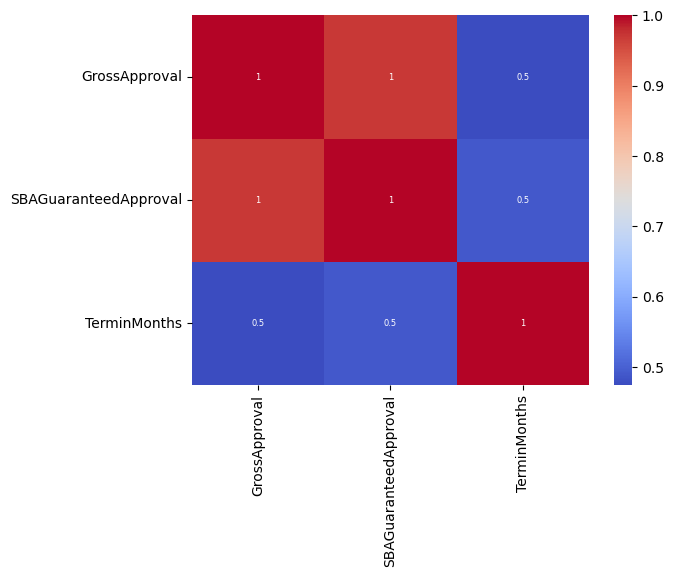

In [81]:
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt='.1g', annot_kws={"size":6})
plt.figsize=(20,20)

plt.show()

In [82]:
df.drop(['SBAGuaranteedApproval'], inplace=True,axis=1)
df.drop(['FirstDisbursementDate'], inplace=True,axis=1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337043 entries, 0 to 337042
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GrossApproval     337024 non-null  float64
 1   Subprogram        337043 non-null  object 
 2   TerminMonths      337043 non-null  int64  
 3   NAICSDescription  152954 non-null  object 
 4   BusinessType      337043 non-null  object 
 5   LoanStatus        337043 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.4+ MB


In [84]:
df['Subprogram'].unique()

array(['Guaranty', 'Contract Guaranty', 'Seasonal Line of Credit',
       'Revolving Line of Credit Exports - Sec. 7(a) (14)',
       'International Trade - Sec, 7(a) (16)',
       'Small General Contractors - Sec. 7(a) (9)',
       'Pollution Control Guaranteed Loans - Sec. 7(a)(12)',
       'Co-GTY with Import/Export',
       'Greenline - Revolving L. of Cred. - Current Assets',
       'Domestic Revolving Line of Credit - Current Assets',
       'Greenline - Revolving L. of Cred. - Fixed Assets',
       'Domestic Revolving Line of Credit - Fixed Assets',
       'Standard Asset Based', 'Small Asset Based',
       'FA$TRK (Small Loan Express)', 'Special Markets Program',
       'Defense Loans and Technical Assistance, Funded 9/26/95',
       'USCAIP Guaranty (NAFTA)', 'Community Express', 'Y2K Loan'],
      dtype=object)

In [85]:
df

,GrossApproval,Subprogram,TerminMonths,NAICSDescription,BusinessType,LoanStatus
0,575000.00,Guaranty,120,NaN,CORPORATION,PIF
1,470000.00,Guaranty,120,"Fiber Can, Tube, Drum, and Similar Products Ma...",CORPORATION,CANCLD
2,95000.00,Guaranty,50,Collection Agencies,CORPORATION,CHGOFF
3,330000.00,Guaranty,96,NaN,INDIVIDUAL,PIF
4,240000.00,Guaranty,180,NaN,CORPORATION,PIF
...,...,...,...,...,...,...
337038,69000.00,FA$TRK (Small Loan Express),60,NaN,CORPORATION,PIF
337039,312000.00,Guaranty,276,"Beer, Wine, and Liquor Stores",INDIVIDUAL,PIF
337040,210000.00,Guaranty,84,NaN,CORPORATION,PIF
337041,450000.00,Standard Asset Based,12,Temporary Help Services,CORPORATION,PIF


In [86]:
df['NAICSDescription'].value_counts()

NAICSDescription
Offices of Dentists                                                       6825
General Automotive Repair                                                 6342
Child Day Care Services                                                   4463
Drycleaning and Laundry Services (except Coin-Operated)                   3467
Offices of Chiropractors                                                  3203
                                                                          ... 
Natural Gas Liquid Extraction                                                1
Other Guided Missile and Space Vehicle Parts and Auxiliary Equipment M       1
Perishable Prepared Food Manufacturing                                       1
Flower, Nursery Stock, and Florists' Supplies Merchant Wholesalers           1
Brick and Structural Clay Tile Manufacturing                                 1
Name: count, Length: 828, dtype: int64

In [87]:
df['NAICSDescription'].unique()

array([nan, 'Fiber Can, Tube, Drum, and Similar Products Manufacturing',
       'Collection Agencies', 'Used Car Dealers',
       'RV (Recreational Vehicle) Parks and Campgrounds',
       'Pharmacies and Drug Stores', 'Landscaping Services',
       'Offices of Chiropractors',
       'Electronic Shopping and Mail-Order Houses',
       'Electrical Appliance, Television, and Radio Set Wholesalers',
       'Automobile and Other Motor Vehicle Wholesalers',
       'Floor Covering Stores', 'New Car Dealers',
       'Drinking Places (Alcoholic Beverages)', 'Hardware Stores',
       'Child Day Care Services', 'Shoe Stores',
       'Computer Systems Design Services', 'Offices of Dentists',
       'Glass and Glazing Contractors', 'Offices of Lawyers',
       'Industrial Machinery and Equipment Wholesalers',
       'Plumbing, Heating, and Air Conditioning Contractors',
       'Fabricated Structural Metal Manufacturing',
       'Video Tape and Disc Rental',
       'Coin-Operated Laundries and Drycl

In [88]:
sector_mapping = {
    'Retail and Wholesale': [
        'Collection Agencies', 'Used Car Dealers', 'Pharmacies and Drug Stores', 'New Car Dealers', 'Shoe Stores', 'Sporting Goods Stores',
        'Grocery Wholesalers', 'Book Stores', 'Specialty Food Stores', 'Hobby, Toy, and Game Stores', 'Family Clothing Stores',
        'Gift, Novelty, and Souvenir Stores', 'Florists', 'Lumber, Plywood, Millwork, and Wood Panel Wholesalers', 
        'Other Commercial Equipment Wholesalers', 'General Line Grocery Wholesalers', 'Paint and Coating Manufacturing', 
        'Book, Periodical, and Newspaper Wholesalers', 'Printing and Writing Paper Wholesalers', 'Industrial and Personal Service Paper Wholesalers',
        'Wine and Distilled Alcoholic Beverage Wholesalers', 'Coffee and Tea Manufacturing', 'Service Establishment Equipment and Supplies Merchant Wholesalers',
        'Tire Dealers', 'Other Gasoline Stations', 'Convenience Stores', 'Meat Markets', 'Optical Goods Stores', 'Electrical Apparatus and Equipment, Wiring Supplies, and Construction Materials Wholesalers',
        'Office Equipment Wholesalers', 'Farm and Garden Machinery and Equipment Wholesalers', 'Nursery and Garden Centers', 'Piece Goods, Notions, and Other Dry Goods Wholesalers',
        'Used Merchandise Stores', 'Retail Bakeries', 'Barber Shops', 'Cafeterias, Grill Buffets, and Buffets', 'Gasoline Stations with Convenience Stores',
        'Stationery and Office Supplies Wholesalers', 'Home Furnishing Wholesalers', 'Paint and Wallpaper Stores', 'Clothing Accessories Stores',
        'Toy and Hobby Goods and Supplies Wholesalers', 'Luggage and Leather Goods Stores', 'Petroleum Lubricating Oil and Grease Manufacturing',
        'Pharmacies and Drug Stores'
    ],
    'Automotive': [
        'Automobile Wholesalers', 'Automotive Repair', 'Motorcycle Dealers', 'Automotive Transmission Repair', 'Car Washes', 'Automotive Glass Replacement',
        'General Automotive Repair', 'Other Automotive Mechanical and Electrical Repair and Maintenance', 'Passenger Car Rental', 'Motor Vehicle Body Manufacturing',
        'Automotive Exhaust System Repair', 'Motor Vehicle Supplies and New Parts Wholesalers', 'Automotive Parts and Accessories Stores',
        'Motor Vehicle Towing', 'All Other Automotive Repair and Maintenance', 'Automobile Manufacturing', 'Motor Vehicle Parts (Used) Wholesalers',
        'Scheduled Passenger Air Transportation', 'Other Nonscheduled Air Transportation'
    ],
    'Manufacturing': [
        'Adhesive Manufacturing', 'Industrial Machinery', 'Equipment Manufacturing', 'Textile Machinery', 'Printing Machinery', 'Pharmaceutical Preparation Manufacturing',
        'Sporting and Athletic Goods Manufacturing','Manufacturing', 'Machine Tool (Metal Cutting Types) Manufacturing', 'Metal Heat Treating'
        'Cut Stone and Stone Product Manufacturing', 'Pump and Pumping Equipment Manufacturing', 'Construction and Mining Equipment Manufacturing',
        'Concrete Block and Brick Manufacturing', 'Electronic Coil, Transformer, and Other Inductor Manufacturing', 'Prefabricated Metal Building and Component Manufacturing'
        'Manufacturing', 'Fluid Power Valve and Hose Fitting Manufacturing', 'Electroplating, Plating, Polishing, Anodizing, and Coloring', 
        'Printing Machinery and Equipment Manufacturing', 'Plastics Material and Resin Manufacturing'
        'Manufacturing', 'Hand and Edge Tool Manufacturing', 'Tobacco and Tobacco Product Wholesalers', 'Rubber Product Manufacturing for Mechanical Use'
        , 'Industrial Process Furnace and Oven Manufacturing', 'Household Cooking Appliance Manufacturing', 'Electric Lamp Bulb and Part Manufacturing'
         'Manufacturing', 'Aluminum Foundries (except Die-Casting)', 'Aluminum Extruded Product Manufacturing', 
        'Vitreous China Plumbing Fixture and China and Earthenware Bathroom Accessories Manufacturing', 'Tire Manufacturing (except Retreading)'
        , 'Sugarcane Mills', 'Steel Investment Foundries', 'Primary Battery Manufacturing', 'Porcelain Electrical Supply Manufacturing'
        , 'Small Arms Manufacturing', 'Motor Home Manufacturing', 'Sheet Metal Work Manufacturing', 'Other Fabricated Wire Product Manufacturing'
        , 'Doll and Stuffed Toy Manufacturing', 'Costume Jewelry and Novelty Manufacturing', 'Iron and Steel Mills',
        'Iron and Steel Pipe and Tube Manufacturing from Purchased Steel', 'Industrial Gas Manufacturing', 'Primary Aluminum Production',
        'Noncellulosic Organic Fiber Manufacturing', 'Leather and Hide Tanning and Finishing', 'Resilient Floor Covering Manufacturing',
        'Nonclay Refractory Manufacturing', 'Other Metal Container Manufacturing', 'Other Miscellaneous Manufacturing', 
        'Household Refrigerator and Home Freezer Manufacturing', 'Rolling Mill Machinery and Equipment Manufacturing', 'Other Hosiery and Sock Mills'
        , 'Apparel Accessories and Other Apparel Manufacturing', 'Snack and Nonalcoholic Beverage Bars'
        , 'Other Structural Clay Product Manufacturing', 'Plastics Pipe and Pipe Fitting Manufacturing',
        'Primary Smelting and Refining of Nonferrous Metal (except Copper and Aluminum)', 'Industrial Valve Manufacturing', 'Nonferrous Forging'
        , 'Optical Goods Stores Manufacturing', 'Totalizing Fluid Meter and Counting Device Manufacturing', 'Automatic Vending Machine Manufacturing'
        , 'Alkalies and Chlorine Manufacturing', 'Motor Home Manufacturing', 'Alkyd Resin Manufacturing', 'Apparel Manufacturing', 'Asbestos Product Manufacturing'
        , 'Asphalt Paving Mixture and Block Manufacturing', 'Bed Spring Manufacturing', 'Beet Sugar Manufacturing'
        , 'Bolt, Nut, Screw, Rivet, and Washer Manufacturing', 'Carbon Black Manufacturing', 'Carbon Paper and Inked Ribbon Manufacturing',
        'Conveyor and Conveying Equipment Manufacturing', 'Cutting Tool and Machine Tool Accessory Manufacturing', 'Dietary Supplement Manufacturing'
        , 'Electric Lamp Bulb and Part Manufacturing', 'Electrical Apparatus and Equipment, Wiring Supplies, and Construction Materials Merchant Wholesalers'
       , 'Electromedical and Electrotherapeutic Apparatus Manufacturing', 'Industrial and Commercial Fan and Blower Manufacturing', 
        'Instrument Manufacturing for Measuring and Testing Electricity and Electrical Signals', 'Lipstick Manufacturing', 'Machine Tool Manufacturing'
        , 'Malt Beverage Manufacturing', 'Mattress Manufacturing', 'Other Commercial and Service Industry Machinery Manufacturing'
        , 'Other Kitchen Utensil, Pot, and Pan Manufacturing', 'Ready-Mix Concrete Manufacturing', 'Semi-Truck Trailer Manufacturing', 'Small Appliance Manufacturing'
        , 'Soap and Other Detergent Manufacturing', 'Speed Changer, Industrial High-Speed Drive, and Gear Manufacturing', 'Steel Wire Drawing'
       , 'Storage Battery Manufacturing', 'Sugarcane Mills Manufacturing', 'Towel and Washcloth Manufacturing', 'Travel Trailer and Camper Manufacturing'
        , 'Vitreous China Plumbing Fixture Manufacturing', 'Watch, Clock, and Part Manufacturing', 'Window Shade Manufacturing', 
        'Wireless Communication Equipment Manufacturing', 'Surgical Appliance and Supplies Manufacturing', 'Surgical and Medical Instrument Manufacturing'
        , 'Instrument Manufacturing for Measuring and Testing Electricity and Electrical Signals', 'Ophthalmic Goods Manufacturing',
        'Lawn and Garden Tractor and Home Lawn and Garden Equipment Manufacturing', 'Toilet Preparation Manufacturing'
        , 'Urethane and Other Foam Product Manufacturing', 'Cut and Sew Apparel Contractors'
        , 'Fur and Leather Apparel Manufacturing', 'Brick and Structural Clay Tile Manufacturing'
        , 'Brick, Stone, and Related Construction Material Wholesalers', 'Other Miscellaneous Fabricated Metal Product Manufacturing'
       , 'Industrial Truck, Tractor, Trailer, and Stacker Machinery Manufacturing', 'All Other Miscellaneous Textile Product Mills'
        , 'Fabric Coating Mills', 'Footwear and Leather Goods Repair', 'Plate Work Manufacturing'
       , 'Industrial Supplies Wholesalers', 'Home Furnishing Wholesalers', 'Lead Pencil and Art Good Manufacturing'
       , 'Blankbook, Looseleaf Binders, and Devices Manufacturing', 'Hat, Cap, and Millinery Manufacturing'
        , 'Hardware Manufacturing', 'Ground or Treated Mineral and Earth Manufacturing'
       , 'Guided Missile and Space Vehicle Manufacturing', 'Hardware Wholesalers'
        , 'Hardware Stores', 'House Slipper Manufacturing', 'Housewares'
        , 'Industrial Machinery and Equipment Wholesalers', 'Blankbook, Looseleaf Binders, and Devices Manufacturing'
        'Manufacturing', 'Book Publishers'],
    
    'Healthcare': [ 'Offices of Chiropractors', 'Offices of Dentists', 'Veterinary Services', 'Kidney Dialysis Centers', 
                   'Psychiatric and Substance Abuse Hospitals', 'Home Health Care Services', 'Optical Instrument and Lens Manufacturing', 
                   'Offices of Optometrists', 'Offices of Podiatrists', 'Dental Equipment and Supplies Manufacturing', 'Dental Laboratories', 
                   'General Medical and Surgical Hospitals', 'Nursing Care Facilities', 'Medical, Dental, and Hospital Equipment and Supplies Wholesalers', 
                   'Specialty Hospitals (except Psychiatric and Substance Abuse)', 'Blood and Organ Banks', 
                   'Residential Intellectual and Developmental Disability, Mental Health, and Substance Abuse Facilities',
                   'Other Residential Care Facilities', 'All Other Miscellaneous Ambulatory Health Care Services',
                   'Pharmacies and Drug Stores', 'Voluntary Health Organizations', 'Emergency and Other Relief Services', 
                   'Medical Laboratories', 'Other Miscellaneous Health Practitioners\' Offices', 'Other Outpatient Care Centers',
                   'Distilleries' ],
    'Construction': [ 'Electrical Contractors', 'General Line Grocery Wholesalers', 'Drywall, Plastering Contractors',
                     'Single Family Housing Construction', 'Industrial Machinery and Equipment Wholesalers', 
                     'Commercial and Institutional Building Construction', 'Highway and Street Construction', 
                     'Drywall, Plastering, Acoustical, and Insulation Contractors', 'Masonry and Stone Contractors', 
                     'Carpentry Contractors', 'Roofing, Siding, and Sheet Metal Contractors', 'General Freight Trucking, Local', 
                     'Water, Sewer, and Pipeline Construction', 'Plumbing, Heating, and Air Conditioning Contractors', 'Truss Manufacturing', 
                     'Trusts, Fiduciary, and Custody Activities', 'Timber Tract Operations', 'Flower, Nursery Stock, and Florists\' Supplies Merchant Wholesalers',
                     'Electronic Resistor Manufacturing'],
   
    'Technology and IT': [
        'Computer Systems Design Services', 'Electronic Shopping', 'Electronic Computer Manufacturing',
        'Custom Computer Programming Services', 'Data Processing Services', 'Bare Printed Circuit Board Manufacturing',
        'Computer and Software Stores', 'Semiconductor and Related Device Manufacturing', 'On-Line Information Services',
        'Computer Storage Device Manufacturing', 'Computer Terminal Manufacturing', 'Computer Facilities Management Services',
        'Computer and Computer Peripheral Equipment and Software Wholesalers', 'Other Electronic Component Manufacturing',
        'Other Computer Peripheral Equipment Manufacturing', 'Electronic Resistor Manufacturing', 'Electronic Connector Manufacturing',
        'Media Representatives', 'Electromedical and Electrotherapeutic Apparatus Manufacturing', 'Optical Goods Stores Manufacturing',
        'Cable Networks', 'Software Publishers', 'Telecommunications Resellers', 'Other Telecommunications', 
        'Cellular and Other Wireless Communications', 'Telephone and Telegraph Apparatus Manufacturing', 'Other Telecommunications',
        'Telecommunications Resellers', 'Cable and Other Subscription Programming', 'Electrical Equipment Manufacturing'
    ],
    'Food and Beverage': [
        'Dairy Product Wholesalers', 'Frozen Cakes, Pies Manufacturing', 'Finfish Fishing', 'Beef Cattle Farming',
        'Confectionery Wholesalers', 'Packaged Frozen Food Wholesalers', 'Beer, Wine, and Liquor Stores', 'Florists',
        'Livestock Slaughtering', 'Frozen Cakes, Pies, and Other Pastries Manufacturing', 'Chicken Egg Production',
        'Cheese Manufacturing', 'Poultry and Poultry Product Wholesalers', 'Fish and Seafood Wholesalers', 
        'Ice Cream and Frozen Dessert Manufacturing', 'Perishable Prepared Food Manufacturing', 'Frozen Specialty Food Manufacturing',
        'Roasted Nuts and Peanut Butter Manufacturing', 'Other Snack Food Manufacturing', 'Soybean Farming', 'Dry Pasta Manufacturing',
        'Coffee and Tea Manufacturing', 'Meat Markets', 'Meat and Meat Product Wholesalers', 'Cane Sugar Refining', 'Malt Manufacturing',
        'Food Service Contractors', 'Other Grocery and Related Products Wholesalers'
    ],

    'Financial Services': [
        'Mortgage and Loan Brokers', 'Tax Preparation Services', 'Regulation of Agricultural Marketing', 'Vocational Rehabilitation Services',
        'Mortgage and Nonmortgage Loan Brokers', 'Offices of Lawyers', 'Title Abstract and Settlement Offices', 'Credit Bureaus',
        'Securities and Commodity Exchanges', 'Open-End Investment Funds', 'Offices of Bank Holding Companies',
        'Financial Transaction Processing, Reserve, and Clearinghouse Activities', 'Commercial Banking', 'Consumer Lending',
        'Sales Financing', 'Other Financial Vehicles', 'Direct Life Insurance Carriers', 'Reinsurance Carriers',
        'All Other Insurance Related Activities', 'Other Financial Investment Activities', 'Direct Title Insurance Carriers',
        'Savings Institutions', 'Credit Unions', 'Real Estate Investment Trusts', 'Banking', 'Financial Services',
        'Security and Commodity Contracts Intermediation and Brokerage', 'Other Direct Insurance (except Life, Health, and Medical) Carriers',
        'Nondepository Credit Intermediation', 'Monetary Authorities-Central Bank'
    ],
    'Professional Services': [
        'Engineering Services', 'Architectural Services', 'Legal Services', 'Design Services', 'Prepress Services',
        'Public Relations Agencies', 'Advertising Agencies', 'Business Associations', 'Facilities Support Services',
        'Business and Secretarial Schools', 'Landscape Architectural Services', 'Environmental Consulting Services',
        'Research and Development in the Physical, Engineering, and Life Sciences', 'Other Scientific and Technical Consulting Services',
        'Management Consulting Services', 'Other Professional, Scientific, and Technical Services', 'Photographic Services',
        'Translation and Interpretation Services', 'Veterinary Services'
    ],
   
    'Leisure and Hospitality': [
        'RV Parks', 'Campsites', 'Drinking Places', 'Fitness Centers', 'Amusement and Theme Parks',
        'Fitness and Recreational Sports Centers', 'Bowling Centers', 'Golf Courses and Country Clubs',
        'Recreational and Vacation Camps (except Campgrounds)', 'Marinas', 'Travel Agencies', 'Tour Operators', 'Full-Service Restaurants'
    ],
    'Agriculture': [
        'Animal Production', 'Poultry Slaughtering', 'Dairy Product Manufacturing', 'Fruit and Vegetable Canning',
        'Livestock Wholesalers', 'Broilers and Other Meat Type', 'Farm Product Warehousing and Storage', 'Wheat Farming',
        'Cotton Farming', 'Horse and Other Equine Production', 'Corn Farming', 'All Other Miscellaneous Crop Farming', 'Potato Farming',
        'Tree Nut Farming', 'Hog and Pig Farming', 'Grape Vineyards', 'Other Vegetable (except Potato) and Melon Farming'
    ],
    'Textile and Apparel': [
        'Children’s Clothing Stores', 'Men’s Clothing Wholesalers', 'Women’s Clothing Stores', 'Carpet Mills',
        'Upholstery Cleaning Services', 'Children\'s and Infants\' Clothing Stores', 'Sewing, Needlework, and Piece Goods Stores',
        'Women\'s, Children\'s, and Infants\' Clothing and Accessories Wholesalers', 'Canvas and Related Product Mills',
        'Broadwoven Fabric Mills', 'Carpet and Rug Mills', 'Textile and Fabric Finishing (except Broadwoven Fabric) Mills',
        'Textile Bag Mills', 'Yarn Spinning Mills', 'Yarn Texturizing, Throwing, and Twisting Mills', 'Narrow Fabric Mills',
        'Fabric Coating Mills', 'Women\'s Footwear (except Athletic) Manufacturing', 'Men\'s Footwear (except Athletic) Manufacturing',
        'Other Footwear Manufacturing'
    ],
    'Media and Entertainment': [
        'Motion Picture Production', 'Television Broadcasting', 'Musical Instrument Manufacturing', 'Video Tape Rental',
        'Radio and Television Broadcasting', 'Motion Picture and Video Production', 'News Dealers and Newsstands',
        'Periodical Publishers', 'Books Printing', 'Prerecorded Tape, Compact Disc, and Record Stores',
        'Musical Instrument and Supplies Stores', 'Camera and Photographic Supplies Stores', 'Photographic Equipment and Supplies Wholesalers',
        'Printing Ink Manufacturing'
    ],
    'Logistics and Transportation': [
        'Charter Bus Industry', 'Truck Trailer Manufacturing', 'Passenger Car Rental', 'Logging', 'Travel Agencies',
        'Manufactured (Mobile) Home Dealers', 'Passenger Car Leasing', 'Taxi Service', 'School and Employee Bus Transportation',
        'Inland Water Freight Transportation', 'Deep Sea Freight Transportation', 'Interurban and Rural Bus Transportation',
        'Postal Service', 'Couriers', 'Pipeline Transportation of Natural Gas', 'Pipeline Transportation of Crude Oil'
    ],
    'Real Estate': [
        'Single Family Housing Construction', 'Residential Building Construction', 'Lessors of Nonfinancial Assets',
        'Lessors of Real Estate', 'Offices of Real Estate Agents and Brokers', 'Residential Property Managers',
        'Lessors of Other Real Estate Property', 'Lessors of Residential Buildings and Dwellings'
    ],
    'Education': [
        'Child Day Care Services', 'Vocational Schools', 'Educational Support Services', 'Elementary and Secondary Schools', 'Junior Colleges'
    ],
    'Environmental Services': [
        'Landscaping Services', 'Plumbing and HVAC Contractors', 'Waste Management', 'Recycling', 'Recyclable Material Wholesalers',
        'Soil Preparation, Planting, and Cultivating', 'Support Activities for Forestry'
    ],
    'Utilities': [
        'Water Well Drilling Contractors', 'Electric Services', 'Water Supply Systems', 'Water Supply and Irrigation Systems',
        'Steam and Air-Conditioning Supply', 'Natural Gas Distribution', 'Sewage Treatment Facilities'
    ],
    'Personal Services': [
        'Beauty and Personal Care', 'Coin-Operated Laundries', 'Drycleaning Services', 'Personal Goods Repair', 'Parking Lots and Garages',
        'Linen Supply', 'Private Households', 'Other Personal and Household Goods Repair and Maintenance'
    ],
    'Miscellaneous Services': [
        'All Other Miscellaneous Services', 'Office Machinery Rental', 'Commercial Equipment Wholesalers', 'Industrial Launderers',
        'Security Systems Services (except Locksmiths)', 'Other Miscellaneous Durable Goods Wholesalers', 'Other Personal Services',
        'Political Organizations', 'Religious Organizations', 'Administration of Public Health Programs',
        'Administration of Air and Water Resource and Solid Waste Programs', 'Administration of Housing Programs'
    ],
    'Real Estate and Rental and Leasing': [
        'Lessors of Real Estate', 'Offices of Real Estate Agents and Brokers', 'Residential Property Managers',
        'Office Machinery and Equipment Rental and Leasing', 'Manufactured Home (Mobile Home) Manufacturing',
        'Wrecking and Demolition Contractors', 'Real Estate Support Activities', 'Facilities Support Services'
    ],
    'Accommodation and Food Services': [
        'Restaurants and Other Eating Places', 'Special Food Services', 'Drinking Places (Alcoholic Beverages)', 'Wineries'
    ],
    'Information and Media': [
        'Publishing Industries', 'Motion Picture and Sound Recording Industries', 'Broadcasting (except Internet)', 'Wired Telecommunications Carriers'
    ],
    'Public Administration': [
        'Executive, Legislative, and Other General Government Support', 'Justice, Public Order, and Safety Activities', 'Administration of Conservation Programs',
        'Administration of Public Health Programs', 'International Affairs', 'Regulation, Licensing, and Inspection of Miscellaneous Commercial Sectors'
    ],
    'Arts, Entertainment, and Recreation': [
        'Performing Arts, Spectator Sports, and Related Industries', 'Museums, Historical Sites, and Similar Institutions', 'Doll and Stuffed Toy Manufacturing',
        'Costume Jewelry and Novelty Manufacturing'
    ]
    }



In [89]:

# Mapping function
def map_industry_to_sector(industry):
    if pd.isna(industry):
        return 'Other'
    for sector, industries in sector_mapping.items():
        if any(industry.startswith(i) for i in industries):
            return sector
    return 'Other'  # Fallback for unmatched industries

# Apply mapping
df['NAICSDescription'] = df['NAICSDescription'].apply(map_industry_to_sector)

# Display the DataFrame
print(df)



        GrossApproval                   Subprogram  TerminMonths  \
0           575000.00                     Guaranty           120   
1           470000.00                     Guaranty           120   
2            95000.00                     Guaranty            50   
3           330000.00                     Guaranty            96   
4           240000.00                     Guaranty           180   
...               ...                          ...           ...   
337038       69000.00  FA$TRK (Small Loan Express)            60   
337039      312000.00                     Guaranty           276   
337040      210000.00                     Guaranty            84   
337041      450000.00         Standard Asset Based            12   
337042     2200000.00                     Guaranty           114   

              NAICSDescription BusinessType LoanStatus  
0                        Other  CORPORATION        PIF  
1                        Other  CORPORATION     CANCLD  
2         Re

In [90]:
df['BusinessType'].unique()

array(['CORPORATION', 'INDIVIDUAL', 'PARTNERSHIP', '        '],
      dtype=object)

In [91]:
df['LoanStatus'].unique()

array(['PIF', 'CANCLD', 'CHGOFF', 'EXEMPT'], dtype=object)

In [92]:
df['LoanStatus'].value_counts()

LoanStatus
PIF       256171
CANCLD     43667
CHGOFF     35306
EXEMPT      1899
Name: count, dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337043 entries, 0 to 337042
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GrossApproval     337024 non-null  float64
 1   Subprogram        337043 non-null  object 
 2   TerminMonths      337043 non-null  int64  
 3   NAICSDescription  337043 non-null  object 
 4   BusinessType      337043 non-null  object 
 5   LoanStatus        337043 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.4+ MB


In [94]:
# Remove rows where LoanStatus is "EXEMPT"
df = df[df["LoanStatus"] != "EXEMPT"]

df["LoanStatus"].value_counts()


LoanStatus
PIF       256171
CANCLD     43667
CHGOFF     35306
Name: count, dtype: int64

In [95]:
df["LoanStatus"] = df["LoanStatus"].replace({
    "PIF": "Good Loan",      
    "CANCLD": "Bad Loan",    
    "CHGOFF": "Bad Loan"     
})


In [96]:
df["LoanStatus"].unique()
df["LoanStatus"].value_counts()

LoanStatus
Good Loan    256171
Bad Loan      78973
Name: count, dtype: int64

In [137]:
# Fill missing values with "Other" 
df["NAICSDescription"] = df["NAICSDescription"].replace(0, "Other")
df["NAICSDescription"].fillna("Other", inplace=True)
df['BusinessType'] = df['BusinessType'].replace(' ', 'OTHER').fillna('OTHER')


In [139]:
df['BusinessType'].unique()

array(['CORPORATION', 'INDIVIDUAL', 'PARTNERSHIP', '        '],
      dtype=object)

In [143]:
# Replace any whitespace entries and NaN with 'OTHER'
df['BusinessType'] = df['BusinessType'].apply(lambda x: 'OTHER' if pd.isna(x) or str(x).strip() == '' else x)


df['BusinessType'].unique()

array(['CORPORATION', 'INDIVIDUAL', 'PARTNERSHIP', 'OTHER'], dtype=object)

In [145]:
df.dropna(inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335125 entries, 0 to 337042
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GrossApproval     335125 non-null  float64
 1   Subprogram        335125 non-null  object 
 2   TerminMonths      335125 non-null  int64  
 3   NAICSDescription  335125 non-null  object 
 4   BusinessType      335125 non-null  object 
 5   LoanStatus        335125 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 17.9+ MB


In [57]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,GrossApproval,TerminMonths
count,335125.00,335125.00
mean,206442.59,123.06
std,248259.29,83.42
min,15.00,0.00
25%,50000.00,60.00
50%,100000.00,84.00
75%,250000.00,180.00
max,4508500.00,549.00


### Encoding

In [149]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Subprogram_encoded=LabelEncoder()
df['Subprogram'] = Subprogram_encoded.fit_transform(df['Subprogram'])

LoanStatus_encoded=LabelEncoder()
df["LoanStatus"] = LoanStatus_encoded.fit_transform(df["LoanStatus"])

description_encoded=LabelEncoder()
df["NAICSDescription"] =description_encoded.fit_transform(df["NAICSDescription"])

BusinessType_encoded=LabelEncoder()
df['BusinessType'] = BusinessType_encoded.fit_transform(df['BusinessType'])

df=df.dropna()


In [61]:
# Mapping encoded values back to original values

encoded_Subprogram = df['Subprogram'].unique()
decoded_Subprogram = Subprogram_encoded.inverse_transform(encoded_Subprogram)

# Creating a dictionary for easy lookup
Subprogram_mapping = dict(zip(encoded_Subprogram, decoded_Subprogram))

print(Subprogram_mapping)

{9: 'Guaranty', 2: 'Contract Guaranty', 13: 'Seasonal Line of Credit', 12: 'Revolving Line of Credit Exports - Sec. 7(a) (14)', 10: 'International Trade - Sec, 7(a) (16)', 15: 'Small General Contractors - Sec. 7(a) (9)', 11: 'Pollution Control Guaranteed Loans - Sec. 7(a)(12)', 0: 'Co-GTY with Import/Export', 7: 'Greenline - Revolving L. of Cred. - Current Assets', 4: 'Domestic Revolving Line of Credit - Current Assets', 8: 'Greenline - Revolving L. of Cred. - Fixed Assets', 5: 'Domestic Revolving Line of Credit - Fixed Assets', 17: 'Standard Asset Based', 14: 'Small Asset Based', 6: 'FA$TRK (Small Loan Express)', 16: 'Special Markets Program', 3: 'Defense Loans and Technical Assistance, Funded 9/26/95', 18: 'USCAIP Guaranty (NAFTA)', 1: 'Community Express', 19: 'Y2K Loan'}


In [63]:
encoded_description = df["NAICSDescription"].unique()
decoded_description = description_encoded.inverse_transform(encoded_description)

# Creating a dictionary for easy lookup
description_mapping = dict(zip(encoded_description, decoded_description))

print(description_mapping)

{15: 'Other', 21: 'Retail and Wholesale', 5: 'Environmental Services', 8: 'Healthcare', 22: 'Technology and IT', 10: 'Leisure and Hospitality', 12: 'Manufacturing', 4: 'Education', 6: 'Financial Services', 3: 'Construction', 16: 'Personal Services', 2: 'Automotive', 24: 'Utilities', 7: 'Food and Beverage', 23: 'Textile and Apparel', 14: 'Miscellaneous Services', 13: 'Media and Entertainment', 17: 'Professional Services', 1: 'Agriculture', 20: 'Real Estate and Rental and Leasing', 11: 'Logistics and Transportation', 18: 'Public Administration', 0: 'Accommodation and Food Services', 9: 'Information and Media', 19: 'Real Estate'}


In [65]:
encoded_LoanStatus = df["LoanStatus"].unique()
decoded_LoanStatus = LoanStatus_encoded.inverse_transform(encoded_LoanStatus)

# Creating a dictionary for easy lookup
LoanStatus_mapping = dict(zip(encoded_LoanStatus, decoded_LoanStatus))

print(LoanStatus_mapping)

{1: 'Good Loan', 0: 'Bad Loan'}


In [151]:
encoded_BusinessType = df['BusinessType'].unique()
decoded_BusinessType = BusinessType_encoded.inverse_transform(encoded_BusinessType)

# Creating a dictionary for easy lookup
BusinessType_mapping = dict(zip(encoded_BusinessType, decoded_BusinessType))

print(BusinessType_mapping)

{0: 'CORPORATION', 1: 'INDIVIDUAL', 3: 'PARTNERSHIP', 2: 'OTHER'}


### Train test split

In [153]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = df.drop(columns=['LoanStatus'])
y = df['LoanStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pipeline

In [156]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [158]:
from sklearn.pipeline import Pipeline

# Define the pipelines for each classifier
pipelines = {
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ])
}


In [160]:
# Define the parameter grids for each classifier
param_grids = {
    'logistic_regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    'decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'random_forest': {
        'classifier__n_estimators': [100,200],
        'classifier__max_depth': [10,20],
        'classifier__min_samples_split': [5,10]
    }
}

In [162]:
# Perform grid search cross-validation for each classifier
best_estimators = {}
for name in pipelines.keys():
    grid_search = GridSearchCV(pipelines[name], param_grids[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")


Best parameters for logistic_regression: {'classifier__C': 1, 'classifier__solver': 'liblinear'}
Best parameters for decision_tree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5}
Best parameters for random_forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


### Model Evaluation


In [164]:
# Evaluate the best models on the test set and generate classification reports
best_model_name = None
best_model_accuracy = 0
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = name

    best_model = best_estimators[best_model_name]
      
    print(f"Accuracy of {name}: {accuracy}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

    
    # Create a DataFrame to compare true and predicted values
    comparison_df = pd.DataFrame({
        'True Values': y_test,
        'Predicted Values': y_pred
        })
    # Display the first few rows of true vs predicted values
    print(comparison_df.head())

Accuracy of logistic_regression: 0.7622379709063782
Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.31      0.00      0.00     15903
           1       0.76      1.00      0.87     51122

    accuracy                           0.76     67025
   macro avg       0.54      0.50      0.43     67025
weighted avg       0.66      0.76      0.66     67025

        True Values  Predicted Values
304887            0                 1
315473            0                 1
234144            1                 1
280467            1                 1
236385            1                 1
Accuracy of decision_tree: 0.805923162998881
Classification Report for decision_tree:
              precision    recall  f1-score   support

           0       0.71      0.31      0.43     15903
           1       0.82      0.96      0.88     51122

    accuracy                           0.81     67025
   macro avg       0.76      0.63      0.6

In [166]:
#best model with accuracy
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy}")

The best model is decision_tree with an accuracy of 0.805923162998881


### New Predictions

In [169]:
sample_data = df.sample(n=5, random_state=42)

In [171]:
sample_data

,GrossApproval,Subprogram,TerminMonths,NAICSDescription,BusinessType,LoanStatus
304887,1000000.00,9,113,15,0,0
315473,99600.00,9,240,15,0,0
234144,50000.00,9,60,3,0,1
280467,313500.00,9,300,15,0,1
236385,83000.00,9,66,15,0,1


In [173]:
X_new = sample_data.drop(columns=['LoanStatus'])
y_new = sample_data['LoanStatus']


In [175]:
model=best_estimators['random_forest']

In [177]:
sample_pred = model.predict(X_new)
accu = accuracy_score(y_new, sample_pred)

comparison_df = pd.DataFrame({
        'True Values': y_new,
        'Predicted Values': sample_pred
        })
# Display the first few rows of true vs predicted values
print(comparison_df.head())


        True Values  Predicted Values
304887            0                 1
315473            0                 1
234144            1                 1
280467            1                 1
236385            1                 1


In [ ]:
GrossApproval, Subprogram, TerminMonths, NAICSDescription, BusinessType

In [187]:
X = np.array([[10000, 'Guaranty', 15,"Manufacturing","OTHER"]])
X

array([['10000', 'Guaranty', '15', 'Manufacturing', 'OTHER']],
      dtype='<U13')

In [189]:
X[:, 1] = Subprogram_encoded.transform(X[:, 1]) 
X[:, 3] = description_encoded.transform(X[:, 3]) 
X[:, 4] = BusinessType_encoded.transform(X[:, 4]) 

In [191]:
y_pred = model.predict(X)
y_pred

array([0])

### Export Model

In [179]:
import pickle
data = {"model": model, "Subprogram_encoded": Subprogram_encoded,
        "LoanStatus_encoded":LoanStatus_encoded,
        "description_encoded":description_encoded,
        "BusinessType_encoded":BusinessType_encoded}

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [181]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded = data["model"]
Subprogram_encoded = data["Subprogram_encoded"]
LoanStatus_encoded=data["LoanStatus_encoded"]
description_encoded=data["description_encoded"]
BusinessType_encoded=data["BusinessType_encoded"]


y_pred = model_loaded.predict(X)
y_pred


array([1, 1, 0, ..., 1, 1, 1])